In [146]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

### Data Exploration

In [110]:
df = pd.read_csv("ACME-HappinessSurvey2020.csv")
print(df)

     Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]


In [81]:
print(df)

     Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]


In [82]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [83]:
df.tail()

,Y,X1,X2,X3,X4,X5,X6
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5
125,0,5,3,2,5,5,5


In [84]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


### Data cleaning

1) Check if there are NaN values

In [86]:
# Check NaN values for columns
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

2) Check for outliers

<Axes: >

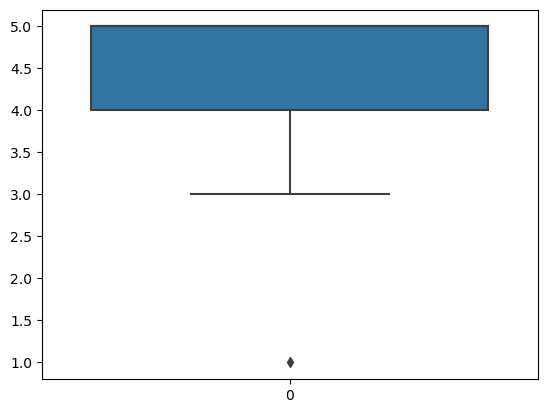

In [87]:
sns.boxplot(df['X1'])

<Axes: >

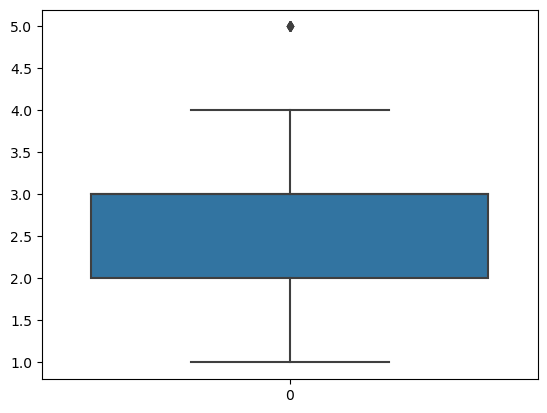

In [88]:
sns.boxplot(df['X2'])

<Axes: >

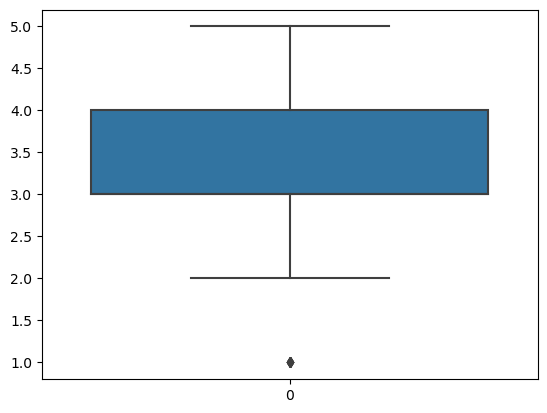

In [89]:
sns.boxplot(df['X3'])

<Axes: >

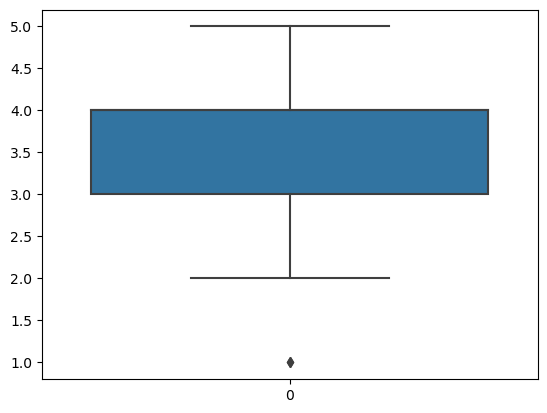

In [90]:
sns.boxplot(df['X4'])

<Axes: >

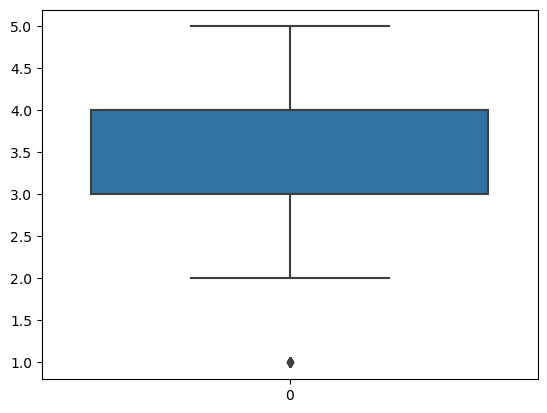

In [91]:
sns.boxplot(df['X5'])

<Axes: >

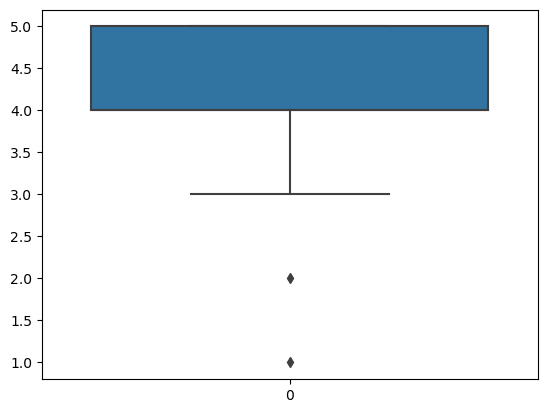

In [92]:
sns.boxplot(df['X6'])

From the box plots above it may seems that there outliers but from the project specification we know that all the features need to be in the range 1-5 and this is true examining the graphs. We can then say that there are not outliers.

### Visualize data and features engineering

C:\Users\PicardiC\AppData\Local\Temp\ipykernel_16180\1826636702.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


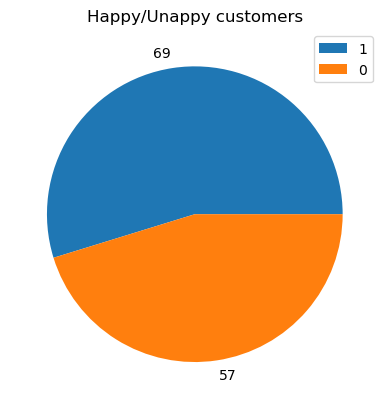

In [93]:
fig, ax = plt.subplots()
happy_counts = df['Y'].value_counts()
ax.pie(happy_counts, labels=happy_counts)
ax.set_title('Happy/Unappy customers')
ax.legend(happy_counts.keys().tolist())
fig.show()

In [94]:
df_happy = df[df.Y==1]
df_happy.shape

(69, 7)

In [95]:
df_nothappy = df[df.Y==0]
df_nothappy.shape

(57, 7)

In [96]:
def show_plot_features(happy_counts_f, not_happy_counts_f, title):
    fig, ax = plt.subplots(1, 2, figsize = (15,8))
    ax[0].pie(happy_counts_f, labels=happy_counts_f)
    ax[0].set_title('Happy customer')
    ax[0].legend(happy_counts_f.keys().tolist())
    ax[1].pie(not_happy_counts_f, labels=not_happy_counts_f)
    ax[1].set_title('Not happy customer')
    ax[1].legend(not_happy_counts_f.keys().tolist())
    fig.suptitle(title)
    # Display the plot
    plt.show()

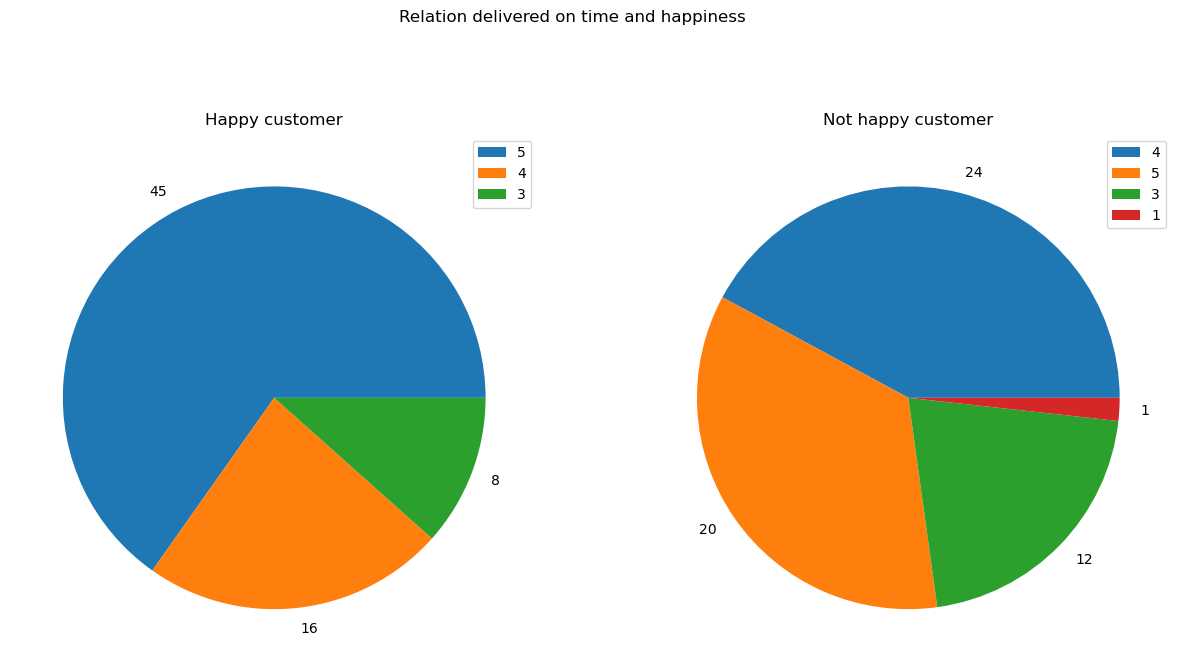

In [97]:
happy_counts_X1 = df_happy['X1'].value_counts()
not_happy_counts_X1 = df_nothappy['X1'].value_counts()
show_plot_features(happy_counts_X1, not_happy_counts_X1, 'Relation delivered on time and happiness')

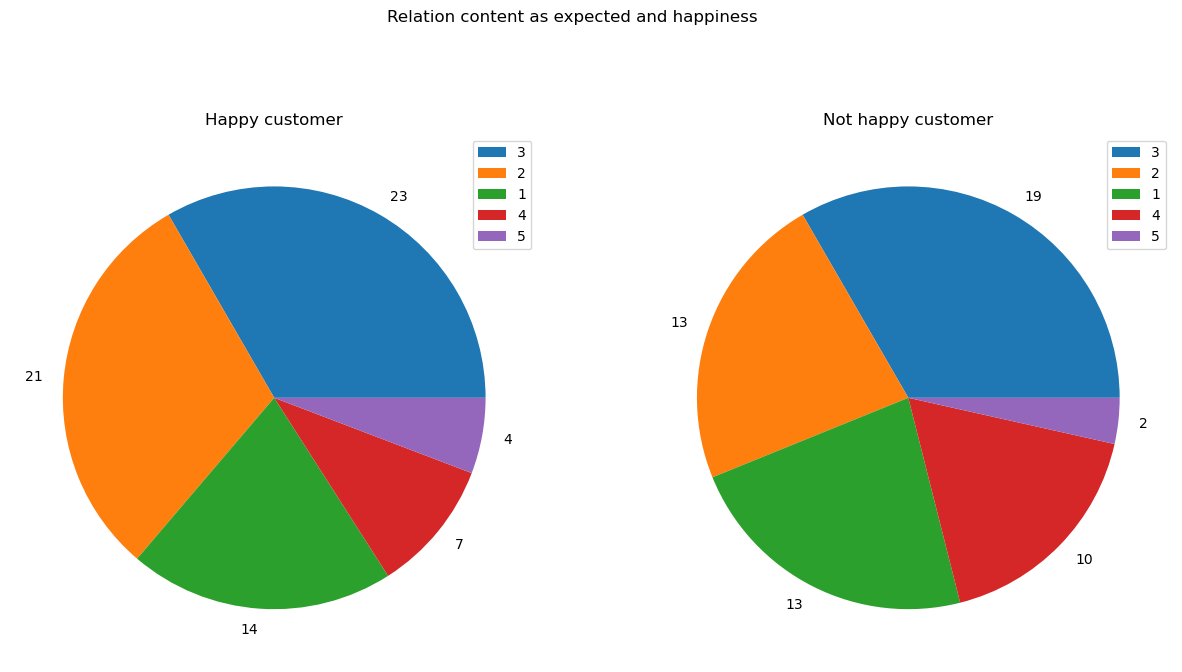

In [98]:
happy_counts_X2 = df_happy['X2'].value_counts()
not_happy_counts_X2 = df_nothappy['X2'].value_counts()
show_plot_features(happy_counts_X2, not_happy_counts_X2, 'Relation content as expected and happiness')

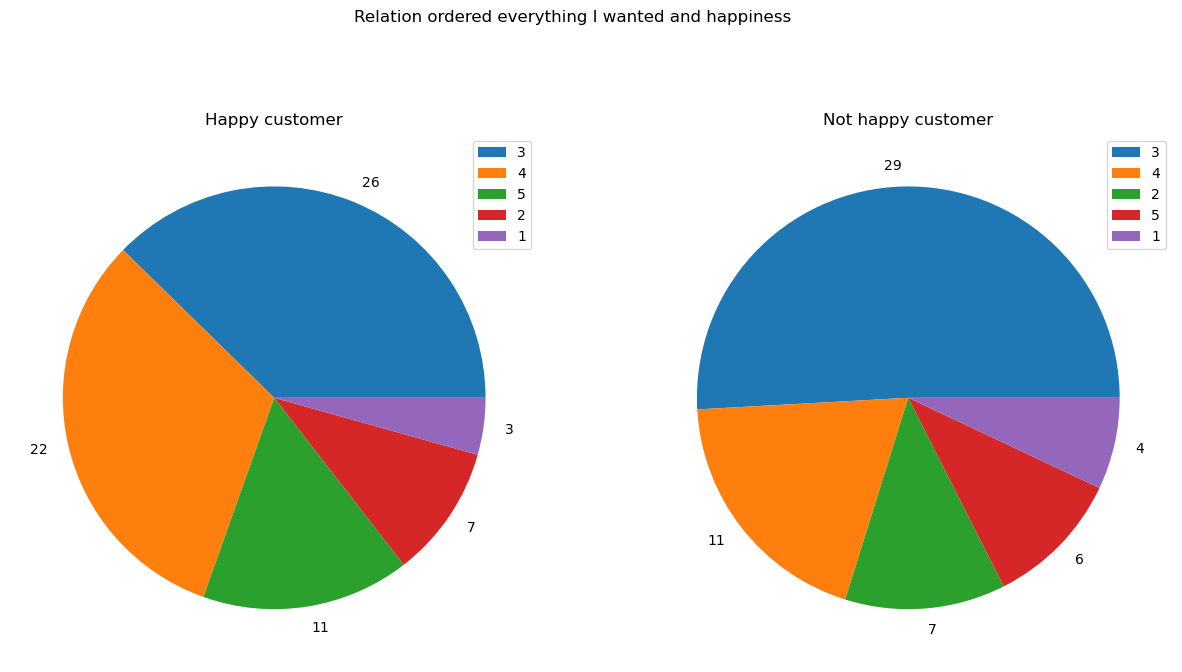

In [99]:
happy_counts_X3 = df_happy['X3'].value_counts()
not_happy_counts_X3 = df_nothappy['X3'].value_counts()
show_plot_features(happy_counts_X3, not_happy_counts_X3, 'Relation ordered everything I wanted and happiness')

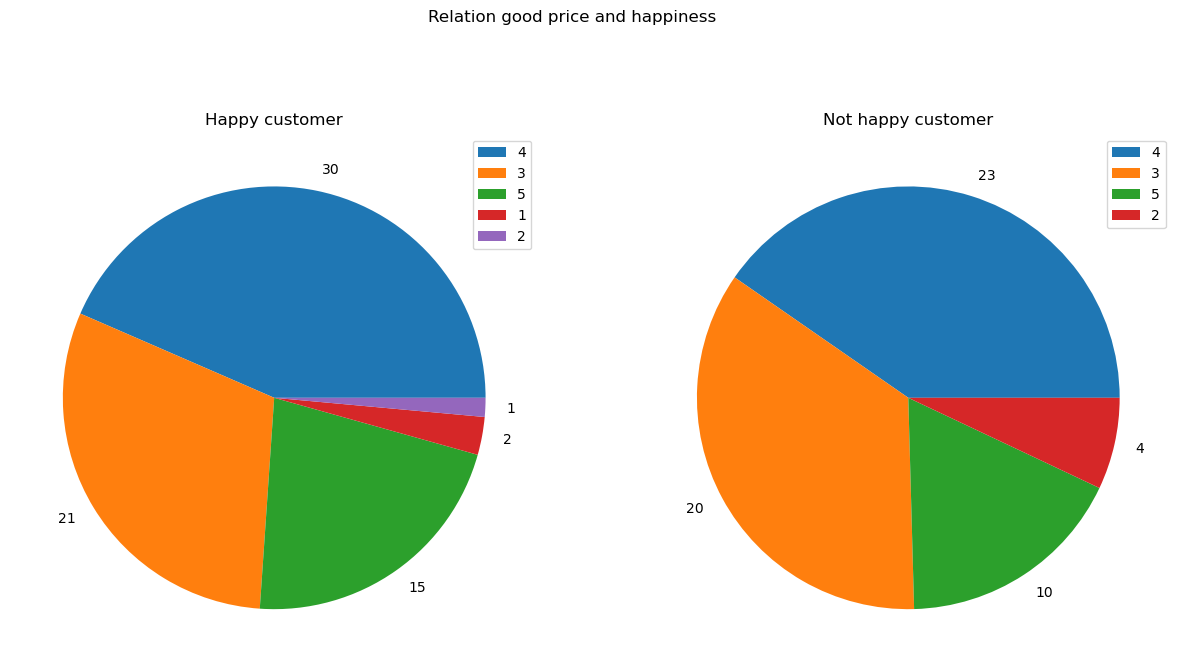

In [100]:
happy_counts_X4 = df_happy['X4'].value_counts()
not_happy_counts_X4 = df_nothappy['X4'].value_counts()
show_plot_features(happy_counts_X4, not_happy_counts_X4, 'Relation good price and happiness')

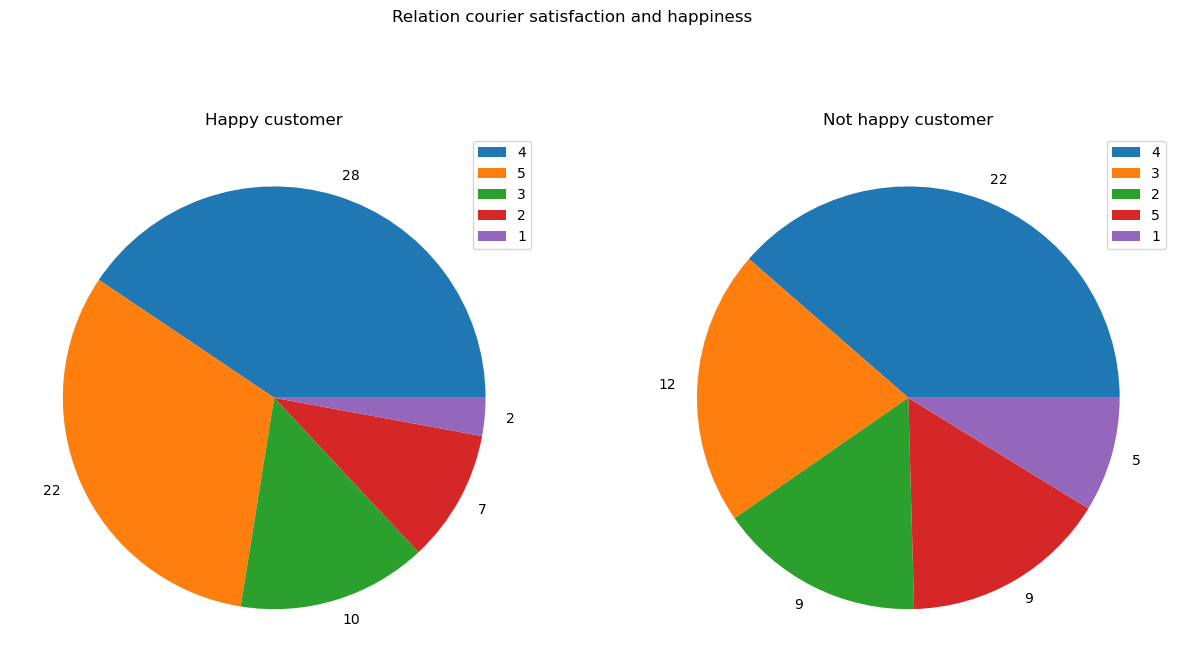

In [101]:
happy_counts_X5 = df_happy['X5'].value_counts()
not_happy_counts_X5 = df_nothappy['X5'].value_counts()
show_plot_features(happy_counts_X5, not_happy_counts_X5, 'Relation courier satisfaction and happiness')

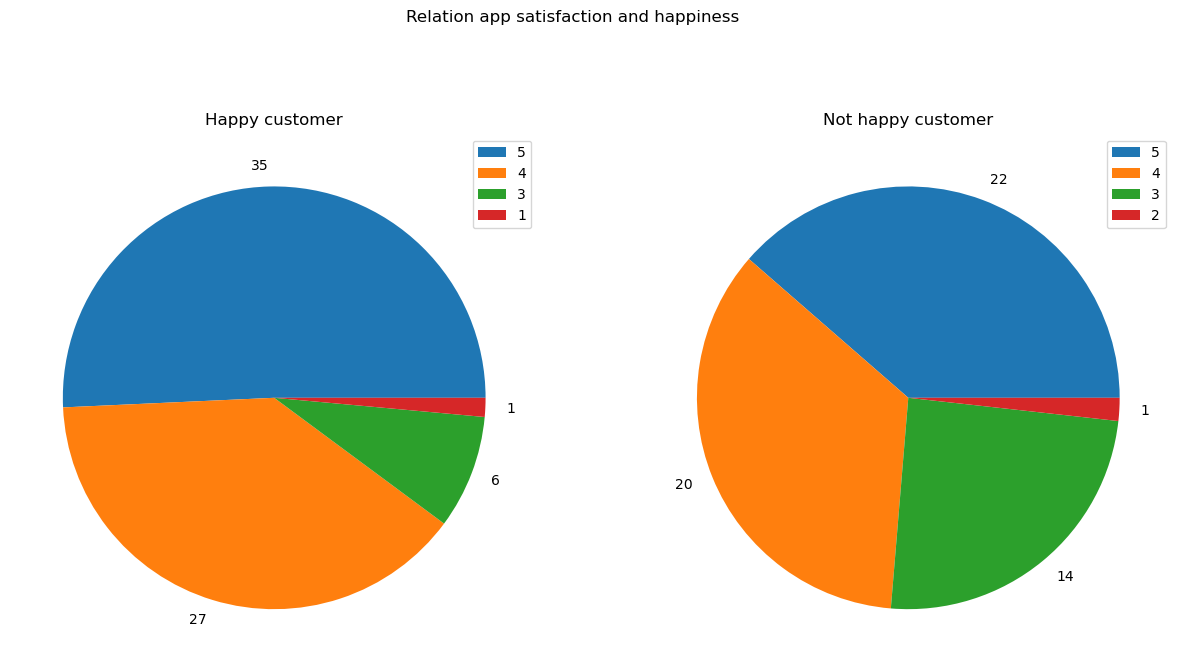

In [102]:
happy_counts_X6 = df_happy['X6'].value_counts()
not_happy_counts_X6 = df_nothappy['X6'].value_counts()
show_plot_features(happy_counts_X6, not_happy_counts_X6, 'Relation app satisfaction and happiness')

From the piecharts examing the relastionship between the happiness and the other features, it is clear that X1 (delivery on time) is a key features to predict happiness. Now let's examine the correlation between the features and the target using the correlation matrix calculated as Pearson correlation.

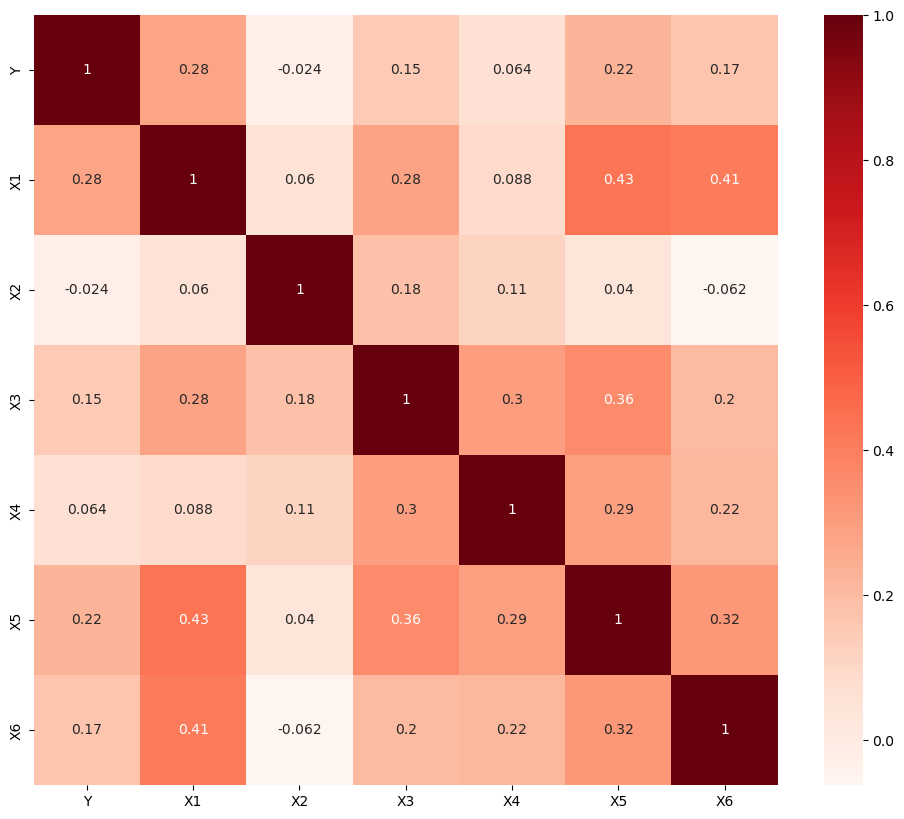

In [103]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The correlation matrix indicates as expected that X1 is the feature most important for the prediction. We can also notrice that there are only two features with a correlation value greater than 0.2: X1(delivery on time) and X5(courier satisfaction).It is reasonable then drop all the other features and doing the prediction only considering X1 and X5. 

In [111]:
df = df.drop(columns=['X2', 'X4','X3','X6'])
df.head()

,Y,X1,X5
0,0,3,2
1,0,3,4
2,1,5,3
3,0,5,3
4,0,5,3


### Prepare dataset

In [112]:
y = df['Y']
X = df.iloc[:,1:7]
print(X.shape, y.shape)

(126, 2) (126,)


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


### Training and evaluate different models

In [135]:
# Instnatiating the models 
logistic_regression = LogisticRegression()
svm = SVC()
tree = DecisionTreeClassifier()
rf =  RandomForestClassifier(max_depth=2, random_state=0)
bst = XGBClassifier(n_estimators=2, max_depth=1, learning_rate=1, objective='binary:logistic')

# Training the models 
logistic_regression.fit(X_train, y_train)
svm.fit(X_train, y_train)
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)
bst.fit(X_train, y_train)

# Making predictions with each model
log_reg_preds = logistic_regression.predict(X_test)
svm_preds = svm.predict(X_test)
tree_preds = tree.predict(X_test)
rf_preds = rf.predict(X_test)
bst_preds = bst.predict(X_test)

In [136]:
model_preds = {
    "Logistic Regression": log_reg_preds,
    "Support Vector Machine": svm_preds,
    "Decision Tree": tree_preds,
    "Random forest": rf_preds,
    "XGBoost": bst_preds
}

for model, preds in model_preds.items():
    print(f"{model} Results:\n{classification_report(y_test, preds)}", sep="\n\n")


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.57      0.27      0.36        15
           1       0.42      0.73      0.53        11

    accuracy                           0.46        26
   macro avg       0.50      0.50      0.45        26
weighted avg       0.51      0.46      0.44        26

Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.70      0.47      0.56        15
           1       0.50      0.73      0.59        11

    accuracy                           0.58        26
   macro avg       0.60      0.60      0.58        26
weighted avg       0.62      0.58      0.57        26

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.64      0.82      0.72        11

    accuracy                           0.73        26
   macro avg       0.74      0.74      0.73 

From the result it is clear that the best model is the Decision Tree reaching 73% accuracy on the test set. Also the values of the precision, recall and F1_score on the two class predicted are accetable considering the limited amount of data. Let's know examine the confusion matrix relative to the choosen model the Decision tree.

In [164]:
confusion_matrix(y_test, bst_preds)



array([[9, 6],
       [4, 7]], dtype=int64)

From the confusion matrix we can notice that the result it's not great considering that on a sample containing 26 data 10 of those are misclassified (6 false negative and 4 false positive). Now let's have a better look at the misclassified samples.


In [162]:
idx_correct_classified=[]
idx_false_negative=[]
idx_false_positive=[]
for ind, el in np.ndenumerate(bst_preds):
    print(y_test[ind[0]])
    if el == y_test[ind[0]]:
        idx_correct_classified.append(ind[0])
    elif el == 0 and y_test_ind[ind[0]] == 1:
        idx_false_negative.append(ind[0])
    else:
        idx_false_negative.append(ind[0])
print(len(idx_correct_classified))
print(len(idx_false_negative))
print(len(idx_false_positive))

0


KeyError: 1